# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [33]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [43]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), 'data', 'WHR2018Chapter2OnlineData.csv')
df = pd.read_csv(filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# YOUR CODE HERE
df.describe()

year  Life Ladder  Log GDP per capita  Social support  \
count  1562.000000  1562.000000         1535.000000     1549.000000   
mean   2011.820743     5.433676            9.220822        0.810669   
std       3.419787     1.121017            1.184035        0.119370   
min    2005.000000     2.661718            6.377396        0.290184   
25%    2009.000000     4.606351            8.310665        0.748304   
50%    2012.000000     5.332600            9.398610        0.833047   
75%    2015.000000     6.271025           10.190634        0.904329   
max    2017.000000     8.018934           11.770276        0.987343   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1553.000000                   1533.000000   
mean                          62.249887                      0.728975   
std                            7.960671                      0.145408   
min                           37.766476                      0.257534   
25%                           57.299580                      0.633754   
50%                           63.803192                      0.748014   
75%                           68.098228                      0.843628   
max                           76.536362                      0.985178   

        Generosity  Perceptions of corruption  Positive affect  \
count  1482.000000                1472.000000      1544.000000   
mean      0.000079                   0.753622         0.708969   
std       0.164202                   0.185538         0.107644   
min      -0.322952                   0.035198         0.362498   
25%      -0.114313                   0.697359         0.621471   
50%      -0.022638                   0.808115         0.717398   
75%       0.094649                   0.880089         0.800858   
max       0.677773                   0.983276         0.943621   

       Negative affect  Confidence in national government  Democratic Quality  \
count      1550.000000                        1401.000000         1391.000000   
mean          0.263171                           0.480207           -0.126617   
std           0.084006                           0.190724            0.873259   
min           0.083426                           0.068769           -2.448228   
25%           0.204116                           0.334732           -0.772010   
50%           0.251798                           0.463137           -0.225939   
75%           0.311515                           0.610723            0.665944   
max           0.704590                           0.993604            1.540097   

       Delivery Quality  Standard deviation of ladder by country-year  \
count       1391.000000                                   1562.000000   
mean           0.004947                                      2.003501   
std            0.981052                                      0.379684   
min           -2.144974                                      0.863034   
25%           -0.717463                                      1.737934   
50%           -0.210142                                      1.960345   
75%            0.717996                                      2.215920   
max            2.184725                                      3.527820   

       Standard deviation/Mean of ladder by country-year  \
count                                        1562.000000   
mean                                            0.387271   
std                                             0.119007   
min                                             0.133908   
25%                                             0.309722   
50%                                             0.369751   
75%                                             0.451833   
max                                             1.022769   

       GINI index (World Bank estimate)  \
count                        583.000000   
mean                           0.372846   
std                            0.086609   
min                 

In [44]:
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [6]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [7]:
corrs = df.corr()['Life Ladder']
corrs.sort_values(ascending=False)

Life Ladder                                                 1.000000
Log GDP per capita                                          0.779476
Healthy life expectancy at birth                            0.729852
Delivery Quality                                            0.706673
Social support                                              0.700299
Democratic Quality                                          0.607034
Positive affect                                             0.554462
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
year                                                       -0.014505
Confidence in national government                          -0.085543
GINI index (World Bank estimate)                           -0.097255
Standard deviation of ladder by country-year               -0.154257
GINI index (World Bank estimate), average 2000-15          -0.172745
Negative affect                   

Note: Log GDP per capita has the strongest linear correlation with the label.

In [45]:
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative',
            'Confidence in national government': 'Confidence'
           }
df.rename(renaming, axis=1, inplace=True)

In [46]:
df.columns

Index(['country', 'year', 'Happiness', 'LogGDP', 'Support', 'Life', 'Freedom',
       'Generosity', 'Corruption', 'Positive', 'Negative', 'Confidence',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

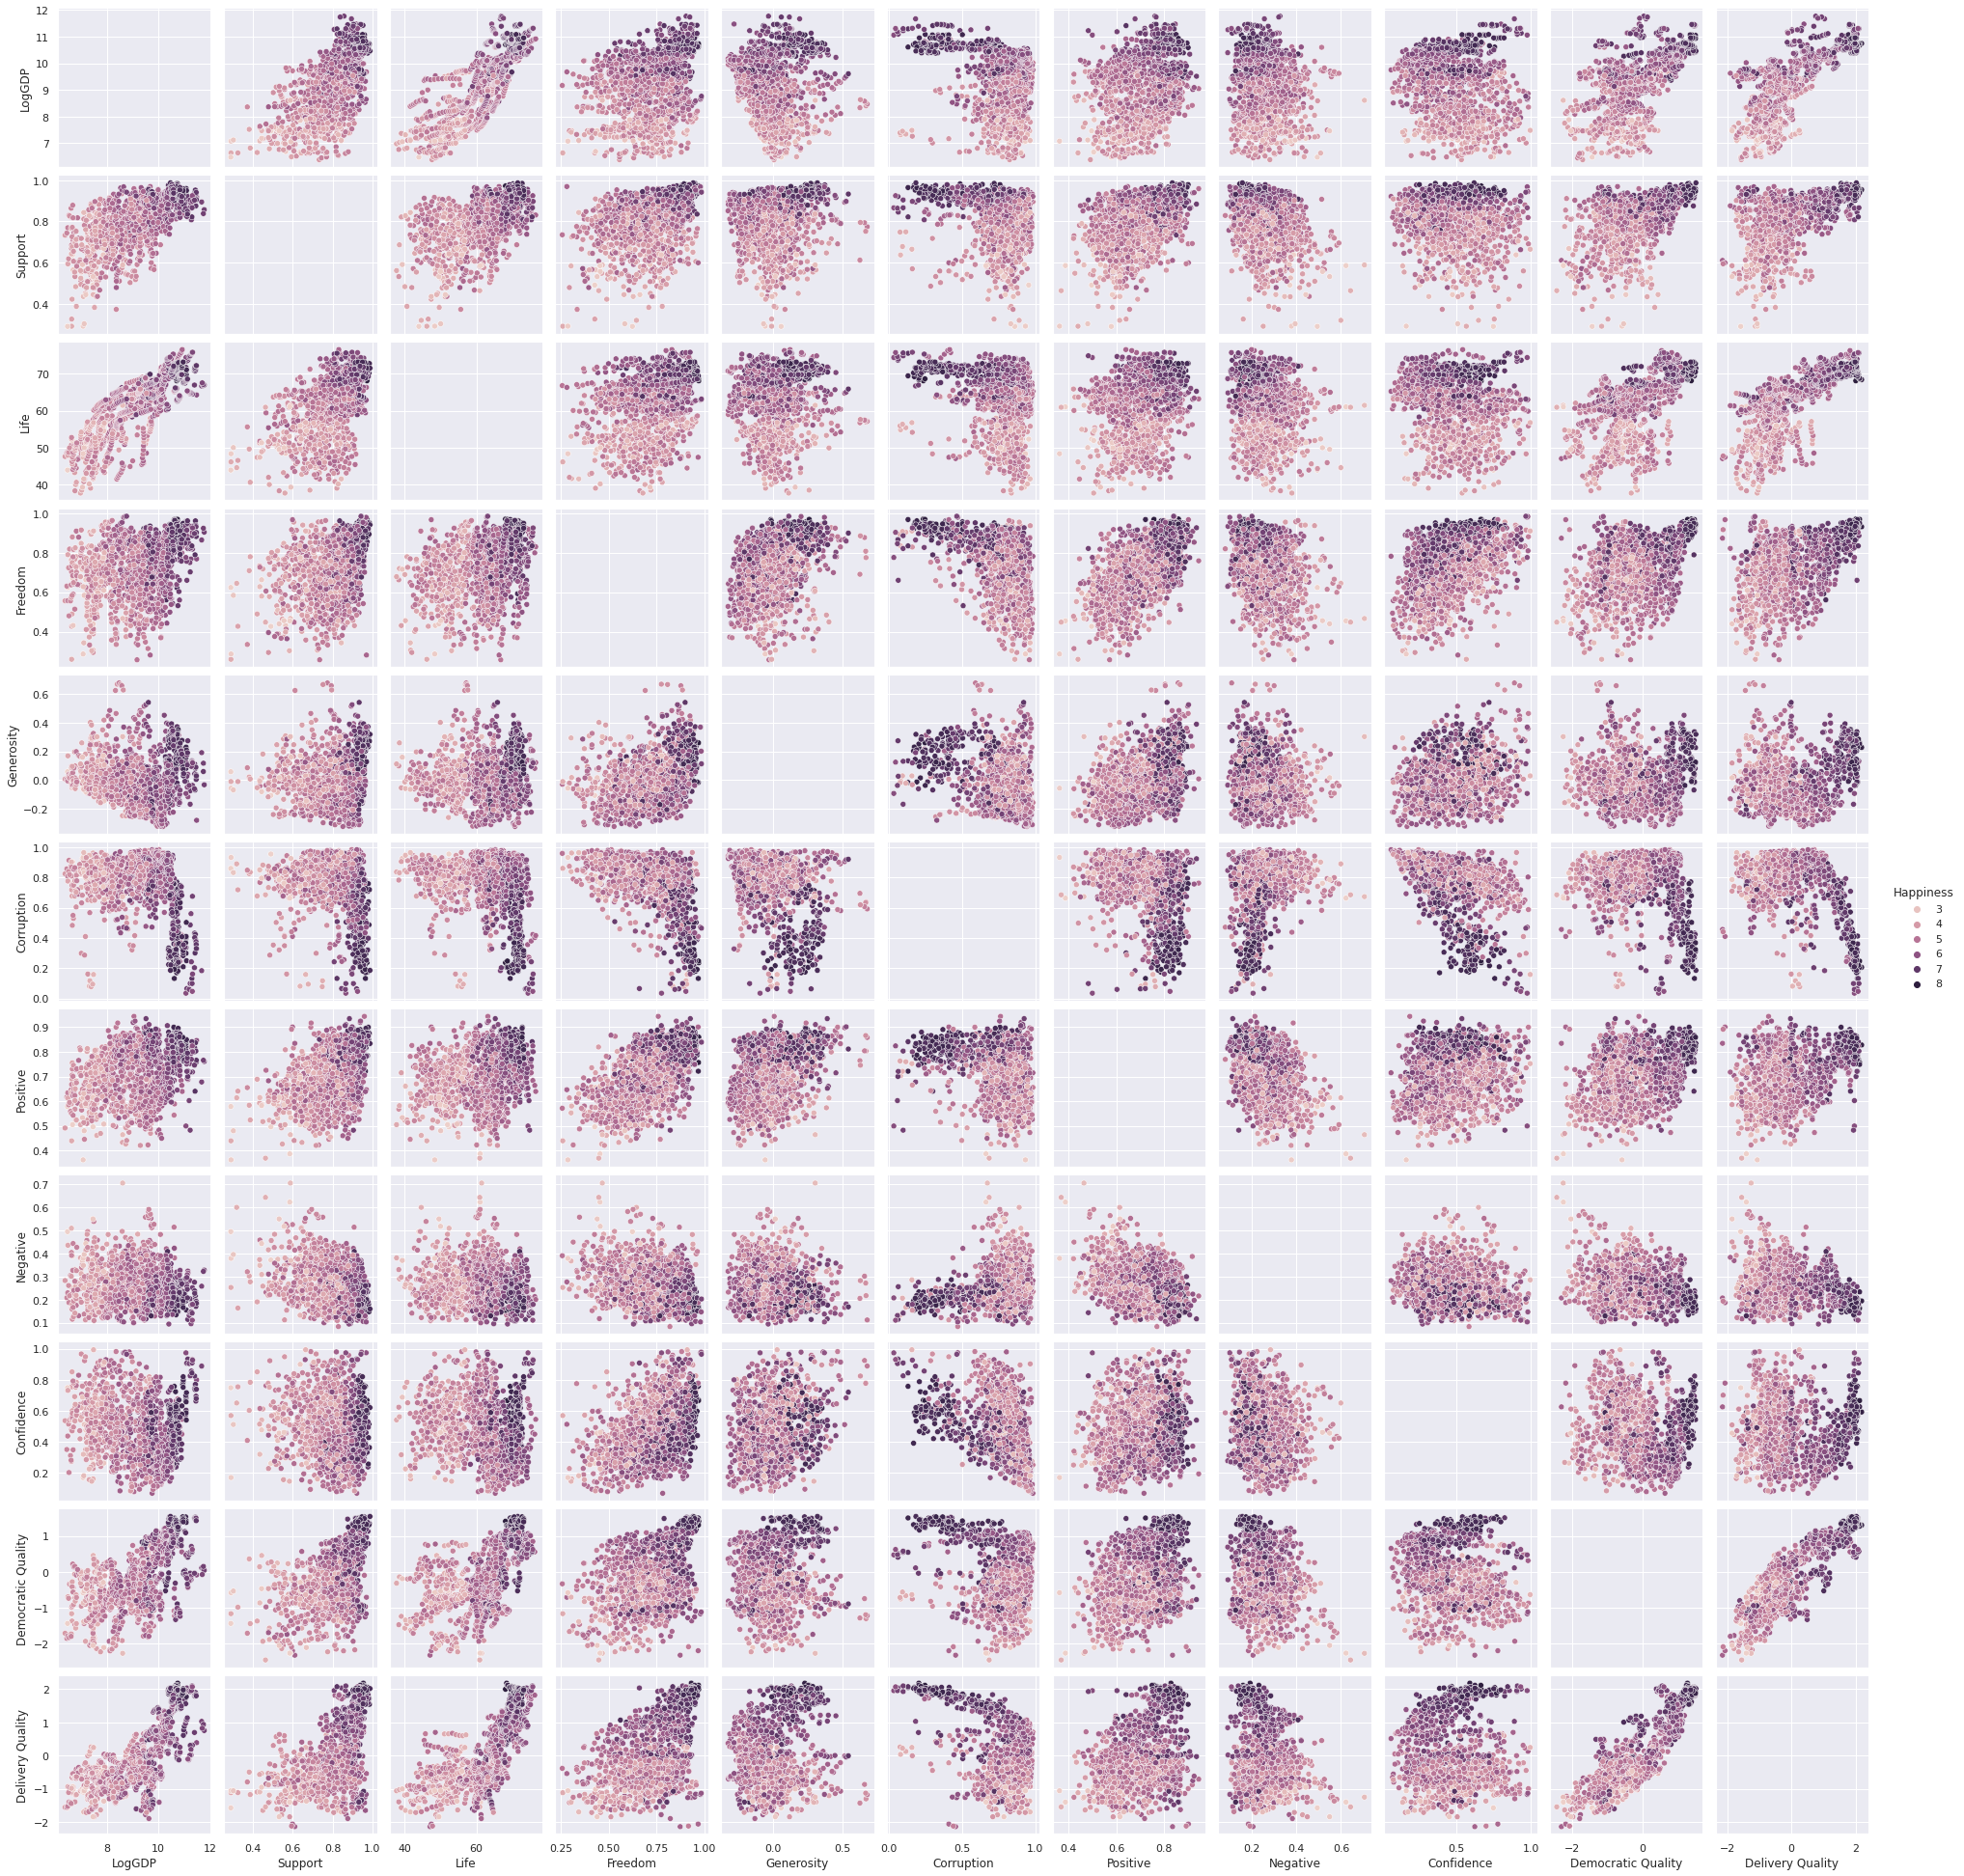

In [10]:
df_sub = df[['LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative', 'Confidence', 'Democratic Quality', 'Delivery Quality','Happiness']]
sns.pairplot(data=df_sub, hue='Happiness')

Note:
LogGDP and Life (Healthy life expectancy at birth) seems to be strongly correlated. The greater the LogGDP, the greater the life expectancy. Democratic Quality and Delivery Quality seems to have a strong positive correlation. Delivery Quality has a medium positive correlation with LogGDP and and life expectancy. Based on these observations, I would not be using life expectancy and Delivery Quality as a feature because we want our features to be generally independent of each other.

In [47]:
df.nunique()

country                                                      164
year                                                          13
Happiness                                                   1562
LogGDP                                                      1535
Support                                                     1549
Life                                                        1500
Freedom                                                     1532
Generosity                                                  1482
Corruption                                                  1472
Positive                                                    1544
Negative                                                    1550
Confidence                                                  1401
Democratic Quality                                          1391
Delivery Quality                                            1391
Standard deviation of ladder by country-year                1562
Standard deviation/Mean o

Note: Country is of object type and has 164 unique strings. Therefore, it would be difficult to do one-hot encoding.

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

# Preparing data


Here I am replacing the null values with means in the columns I will be using as features:

In [ ]:
mean_gdp = df['LogGDP'].mean()
mean_support = df['Support'].mean()
mean_freedom = df['Freedom'].mean()
mean_generosity = df['Generosity'].mean()
mean_corruption = df['Corruption'].mean()
mean_positive = df['Positive'].mean()
mean_negative = df['Negative'].mean()
mean_confidence = df['Confidence'].mean()
mean_democratic = df['Democratic Quality'].mean()

df['LogGDP'].fillna(value=mean_gdp, inplace=True)
df['Support'].fillna(value=mean_support, inplace=True)
df['Freedom'].fillna(value=mean_freedom, inplace=True)
df['Generosity'].fillna(value=mean_generosity, inplace=True)
df['Corruption'].fillna(value=mean_corruption, inplace=True)
df['Positive'].fillna(value=mean_positive, inplace=True)
df['Negative'].fillna(value=mean_negative, inplace=True)
df['Confidence'].fillna(value=mean_confidence, inplace=True)
df['Democratic Quality'].fillna(value=mean_democratic, inplace=True)

In [49]:
np.sum(df.isnull(), axis=0)

country                                                       0
year                                                          0
Happiness                                                     0
LogGDP                                                        0
Support                                                       0
Life                                                          9
Freedom                                                       0
Generosity                                                    0
Corruption                                                    0
Positive                                                      0
Negative                                                      0
Confidence                                                    0
Democratic Quality                                            0
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

I will not be using country and year as features it doesn't seem as relevant in this problem. I am trying to predict happiness independent of country and year. There are also too many countries (164) to be used as a categorical variable. Since I am not using country and year, I will not be using Standard deviation of ladder by country-year and Standard deviation/Mean of ladder by country-year. There are a lot of null values for GINI index. Using GINI index may not contribute significant information to the model. Therefore, I will not be using GINI index (World Bank estimate), GINI index (World Bank estimate), average 2000-15, and gini of household income reported in Gallup, by wp5-year as features. Finally, I will not be using Life (life expectancy) and Delivery Quality as features due to the strong correlations I noted in the previous part.

<b>Features:</b>
1. LogGDP
2. Support
3. Freedom
4. Generosity
5. Corruption
6. Positive
7. Negative
8. Confidence
9. Democratic Quality

<b>Label:</b> 
Happiness (Life Ladder)

In [50]:
exclude = ['Happiness', 'country', 'year', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year', 'Life', 'Delivery Quality']
X = df.drop(columns=exclude)
y = df['Happiness']

# Fit the model

### Create training and test data sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

###  Linear Regression

In [52]:
# Create the LinearRegression model object
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_pred = lr_model.predict(X_test)

# Compute RMSE and R2 scores
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
lr_r2 = r2_score(y_test, lr_pred)

In [53]:
print('Weights:')
i = 0
for w in lr_model.coef_:
    print(f"w_{i+1} [Weight of {X.columns[i]}] = {w}")
    i += 1
print('\nIntercept:')
print(lr_model.intercept_)

Weights:
w_1 [Weight of LogGDP] = 0.4419198192618942
w_2 [Weight of Support] = 1.8664535367777049
w_3 [Weight of Freedom] = 0.8782809362961603
w_4 [Weight of Generosity] = 0.43206067541442456
w_5 [Weight of Corruption] = -0.872882784567004
w_6 [Weight of Positive] = 1.9512481406761424
w_7 [Weight of Negative] = -0.08561660852583974
w_8 [Weight of Confidence] = -0.7435018395107129
w_9 [Weight of Democratic Quality] = 0.049134235992094766

Intercept:
-1.1402904097446829


In [54]:
print('[LR Model Performance]')
print('RMSE =', lr_rmse)
print('R^2 =', lr_r2)

[LR Model Performance]
RMSE = 0.5586341647217677
R^2 = 0.7578166858190365


## Decision Tree

### Set up a parameter grid

In [55]:
param_grid = {'max_depth': [4, 8, 12, 16, 20], 'min_samples_leaf': [25, 50, 75]}

In [56]:
print('Running Grid Search...')

# Create a DecisionTreeRegressor model
dt_regressor = DecisionTreeRegressor()

# Run a Grid Search with 3-fold cross-validation
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')

# Fit the model
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [57]:
rmse_dt = -1 * dt_grid_search.best_score_
print(f"DT RMSE for the best model is: {rmse_dt}")

dt_best_params = (dt_grid_search.best_estimator_.max_depth, dt_grid_search.best_estimator_.min_samples_leaf)
print(f"DT max_depth for the best model is: {dt_best_params[0]}")
print(f"DT min_samples leaf for the best model is: {dt_best_params[1]}")

DT RMSE for the best model is: 0.5727678000427793
DT max_depth for the best model is: 8
DT min_samples leaf for the best model is: 50


### Fit decision tree model

In [58]:
# Create DecisionTreeRegressor model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params[0], min_samples_leaf=dt_best_params[1])

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Use fitted model to make predictions on the test data
dt_pred = dt_model.predict(X_test)

# Compute RMSE and R2 scores
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_r2 = r2_score(y_test, dt_pred)

print('[DT Model Performance]')
print('RMSE =', dt_rmse)
print('R^2 =', dt_r2)

[DT Model Performance]
RMSE = 0.5368822544104039
R^2 = 0.7763096073861011


## Gradient Boosted Decision Tree

### Set up a parameter grid

In [59]:
param_grid = {'max_depth': [4, 8, 12, 16, 20], 'n_estimators': [50, 100, 200, 300]}

In [60]:
print('Running Grid Search...')

# Create GradientBoostingRegressor model
gbdt_regressor = GradientBoostingRegressor()

# Run a Grid Search with 3-fold cross validation
gbdt_grid = GridSearchCV(gbdt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')

# Fit the model
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [61]:
rmse_gbdt = -1 * gbdt_grid_search.best_score_
print(f"GBDT RMSE for the best model is: {rmse_gbdt}")

gbdt_best_params = (gbdt_grid_search.best_estimator_.max_depth, gbdt_grid_search.best_estimator_.n_estimators)
print(f"GBDT max_depth for the best model is: {gbdt_best_params[0]}")
print(f"GBDT n_estimators for the best model is: {gbdt_best_params[1]}")

GBDT RMSE for the best model is: 0.4718798240966395
GBDT max_depth for the best model is: 8
GBDT n_estimators for the best model is: 50


### Fit gradient boosted decision tree model

In [62]:
# Create GradientBoostingRegressor model with best parameters
gbdt_model = GradientBoostingRegressor()

# Fit model to training data
gbdt_model.fit(X_train, y_train)

# Use fitted model to make predictions on test data
gbdt_pred = gbdt_model.predict(X_test)

# Compute RMSE and and R2 scores
gbdt_rmse = mean_squared_error(y_test, gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, gbdt_pred)

print('[GBDT Model Performance]')
print('RMSE =', gbdt_rmse)
print('R^2 =', gbdt_r2)

[GBDT Model Performance]
RMSE = 0.460518434026884
R^2 = 0.835417645403629


## Random Forest

### Set up a parameter grid

In [63]:
param_grid = {'max_depth': [4, 8, 12, 16, 20], 'n_estimators': [50, 100, 200, 300]}

In [64]:
print('Running Grid Search...')

# Create RandomForestRegressor model object
rf_regressor = RandomForestRegressor()

# Run a Grid Search with 3-fold cross validation
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')

# Fit the model
rf_grid_search = rf_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [65]:
rmse_rf = -1 * rf_grid_search.best_score_
print(f"RF RMSE for the best model is: {rmse_rf}")

rf_best_params = (rf_grid_search.best_estimator_.max_depth, rf_grid_search.best_estimator_.n_estimators)
print(f"RF max_depth for the best model is: {rf_best_params[0]}")
print(f"RF n_estimators for the best model is: {rf_best_params[1]}")

RF RMSE for the best model is: 0.451920501620517
RF max_depth for the best model is: 20
RF n_estimators for the best model is: 300


### Fit random forest model

In [66]:
# Create a RandomForestRegressor model with the best parameters
rf_model = RandomForestRegressor(max_depth=rf_best_params[0], n_estimators=rf_best_params[1])

# Fit the model to training data
rf_model.fit(X_train, y_train)

# Use the fitted model to make predictions on test data
rf_pred = rf_model.predict(X_test)

# Compute RMSE and R2 scores
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_r2 = r2_score(y_test, rf_pred)

print('[RF Model Performance]')
print('RMSE =', rf_rmse)
print('R^2 =', rf_r2)

[RF Model Performance]
RMSE = 0.42494850355827646
R^2 = 0.8598600877147258


## Stacking

I initially set the hyperparameters of each model based on the previous grid searches I performed. I later removed the hyperparameter configurations and discovered that it produced very similar results.

In [67]:
estimators_best = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

# estimators_best = [("DT", DecisionTreeRegressor(max_depth=12, min_samples_leaf=25)),
#               ("RF", RandomForestRegressor(max_depth=20, n_estimators=300)),
#               ("GBDT", GradientBoostingRegressor(max_depth=8, n_estimators=100)),
#               ("LR", LinearRegression())
#              ]

In [68]:
# Create StackingRegressor model
stacking_model = StackingRegressor(estimators=estimators_best)

# Fit model to training data
stacking_model.fit(X_train, y_train)

# Use fitted model to make predictions on test data
stacking_pred = stacking_model.predict(X_test)

# Compute RMSE and R2 scores
stacking_rmse = mean_squared_error(y_test, stacking_pred, squared=False)
stacking_r2 = r2_score(y_test, stacking_pred)

print('[Stacking Model Performance]')
print('RMSE =', stacking_rmse)
print('R^2 =', stacking_r2)

[Stacking Model Performance]
RMSE = 0.42144270848103693
R^2 = 0.8621628383205947


# Model Selection

## Visualize model performance

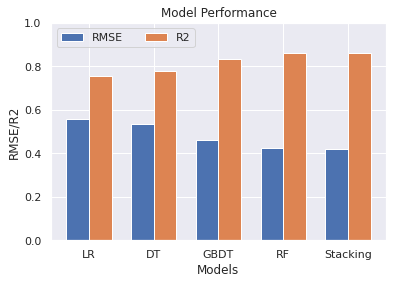

In [69]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse, stacking_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2, stacking_r2]
labels = ['LR', 'DT', 'GBDT', 'RF', 'Stacking']

rg = np.arange(5)
width = 0.35
plt.bar(rg, RMSE_Results, width, label='RMSE')
plt.bar(rg + width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel('Models')
plt.ylabel('RMSE/R2')
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Of the 5 algorithms I applied, random forest and stacking produced the best results. Random forest has a RMSE of 0.43 and R^2 score of 0.86. Stacking has a RMSE of 0.42 and R^2 score of 0.86. The algorithm that performed the worst is linear regression with a RMSE of 0.56 and R^2 score of 0.76. 